### Task 1

Hobbyist         object
Age             float64
Age1stCode       object
CompTotal       float64
Country          object
WorkWeekHrs     float64
YearsCode        object
YearsCodePro     object
dtype: object 

Hobbyist         object
Age               int32
Age1stCode        int32
CompTotal       float64
Country          object
WorkWeekHrs     float64
YearsCode         int32
YearsCodePro      int32
dtype: object


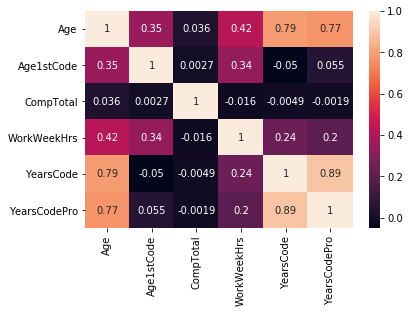

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from scipy import stats
from sklearn.metrics import mean_squared_error

# chose 5 numerical columns
chosen_cols = ['Respondent', 'Age', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'CompTotal', 'WorkWeekHrs', 'Hobbyist', 'Country']
df = pd.read_csv("C:/Users/macko/Repos/Machine_learning/survey_results_public.csv", 
                 usecols=chosen_cols,
                 index_col='Respondent').dropna()

# checking types
print(df.dtypes, '\n')

# change string values to numbers
df.loc[df['YearsCode'] == 'Less than 1 year'] = 0
df.loc[df['YearsCode'] == 'More than 50 years'] = 60
df.loc[df['YearsCodePro'] == 'Less than 1 year'] = 0
df.loc[df['Age1stCode'] == 'Younger than 5 years'] = 4

# change types to integer
df['Age'] = df['Age'].astype(int)
df['YearsCode'] = df['YearsCode'].astype(int)
df['YearsCodePro'] = df['YearsCodePro'].astype(int)
df['Age1stCode'] = df['Age1stCode'].astype(int)
print(df.dtypes)

# sort out invalid values
# df = df[(df['Age'] > int(15)) & (df['Age'] < int(90)) & (df['CompTotal'] < 5e8) & (df['WorkWeekHrs'] <= 168)]
df = df[(df['WorkWeekHrs'] <= 168)]
# correlation map
sns.heatmap(df.corr(), annot=True)
plt.show()

In [2]:
# deleting 2 added values from the list
cols = df.columns.values.tolist()
cols.remove('Hobbyist')
cols.remove('Country')
cols

['Age', 'Age1stCode', 'CompTotal', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']

In [3]:
df.head(1)

,Hobbyist,Age,Age1stCode,CompTotal,Country,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,
8,Yes,36,12,116000.0,United States,39.0,17,13


In [4]:
df[cols].head(1)

,Age,Age1stCode,CompTotal,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,
8,36,12,116000.0,39.0,17,13


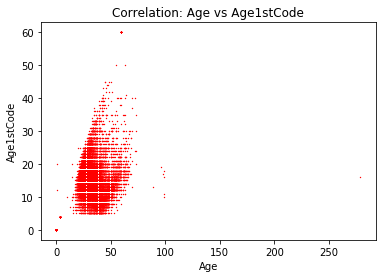

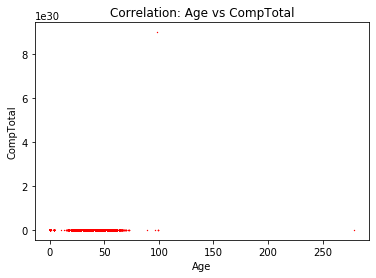

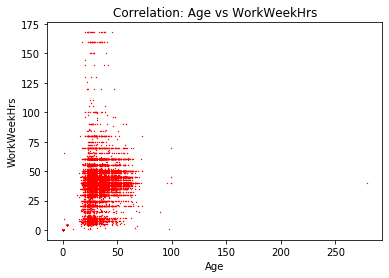

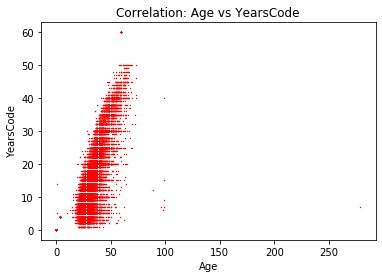

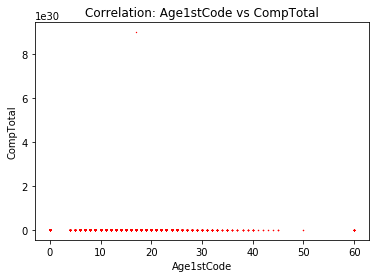

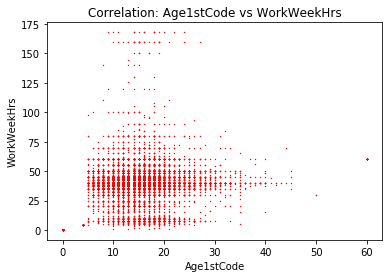

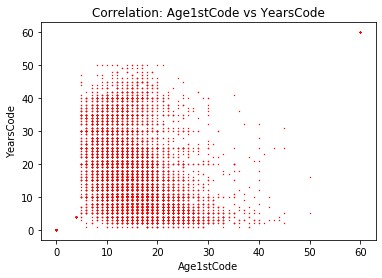

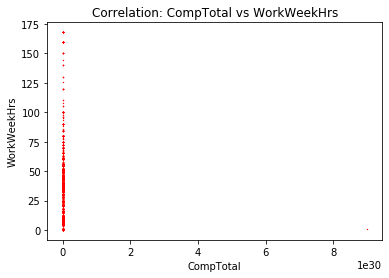

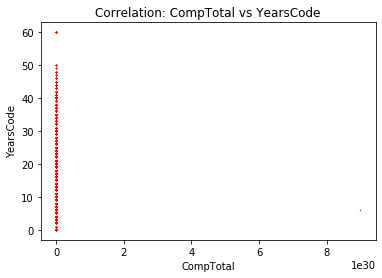

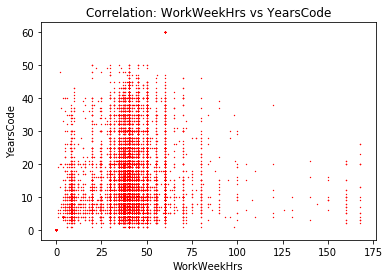

In [5]:
i = 0

# display correlation plots
for x_val in df[cols]: # taking only desired 5 columns
    for i in range (cols.index(x_val) + 1, 5):
        plt.plot(df[x_val], df[cols[i]], 'rp', markersize=0.5)
        plt.xlabel(x_val)
        plt.ylabel(cols[i])
        plt.title('Correlation: ' + str(x_val) + ' vs ' + cols[i])
        plt.show()

### Task 2

In [6]:
print(df.Hobbyist.unique())

# Converting string to a number
print(df.Hobbyist.head(5))

hobby_dict = {'Yes': 1, 'No': 0, 0: 2, 4: 2, 60: 2}
df['Hobbyist'] = df['Hobbyist'].map(hobby_dict)
df['Hobbyist'].dropna()

print(df.Hobbyist.unique())

['Yes' 'No' 0 4 60]
Respondent
8     Yes
10    Yes
11    Yes
12     No
13    Yes
Name: Hobbyist, dtype: object
[1 0 2]


### One-hot Encoding
It is a type of vector representation in which all of the elements in a vector are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element.

One-hot encoding transforms categorical features to a format that works better with classification and regression algorithms. It's very useful in methods where multiple types of data representation is necessary.

In [7]:
# Define dataframe consisting only of 2 chosen countries
# df_ohe = df[(df["Country"] == "Poland") | (df["Country"] == "Germany")]
# df_ohe

df_ohe = pd.get_dummies(df, columns=["Country"])

### Task 3

In [8]:
df_task1 = df[cols]

# on base of file regression-v0.ipynb
# standard Deviation - ie. take only records that are within +-2 sd
df_task1_sd = df_task1[np.abs(df_task1 - df_task1.mean()) <= 2*df_task1.std()].dropna()

# quantiles determine % of records for each variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# taking only records that are oppsite to inteval: x < 25%, x > 75%
# it must be so, otherwise it would be taken values x < 75% and x > 25%, so basically whole interval
df_task1_q = df_task1[~((df_task1 < Q1) | (df_task1 > Q3)).any(axis=1)]
# print(df_task1.describe(), df_task1_q.describe(), sep="\n"*3)

# drop outliers on base of quantlies and sd
df_no_outliers = df_task1.drop(df_task1_q.index)#.drop(df_task1_sd)

# check if deduction was correct
print((df_task1.count() - df_task1_q.count() == df_no_outliers.count()))

Age             True
Age1stCode      True
CompTotal       True
WorkWeekHrs     True
YearsCode       True
YearsCodePro    True
dtype: bool


### Task 4

In [9]:
# dependent variable 
y = df[['WorkWeekHrs']]
# independent variables
x1 = df[['Age']]
x2 = df[['Age1stCode']]
args = x1.merge(x2, left_on='Respondent', right_on='Respondent')
args2 = df_ohe[['Age', 'Age1stCode', 'Country_Poland', 'Country_Germany', 'Hobbyist']]

In [11]:
# linear regression models + MSE
reg_mod_1 = linear_model.LinearRegression()
reg_mod_1.fit(x1, y)
print('Coefficients: ', reg_mod_1.coef_, '\nMSE: \n %.2f' % (mean_squared_error(y, reg_mod_1.predict(x1))))

reg_mod_2 = linear_model.LinearRegression()
reg_mod_2.fit(args, y)
print('Coefficients: ', reg_mod_2.coef_, '\nMSE: \n %.2f' % (mean_squared_error(y, reg_mod_2.predict(args))))

reg_mod_3 = linear_model.LinearRegression()
reg_mod_3.fit(args2, y)
print('Coefficients: ', reg_mod_3.coef_, '\nMSE: \n %.2f' % (mean_squared_error(y, reg_mod_3.predict(args2))))

Coefficients:  [[0.54277731]] 
MSE: 
 153.15
Coefficients:  [[0.44308771 0.53209972]] 
MSE: 
 145.14
Coefficients:  [[ 0.40086439  0.46055534  3.13330256  0.16686871 -3.43655748]] 
MSE: 
 142.62
